# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 590


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1
    
for i, city in enumerate(cities):

    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    
    city_url = url + "&q=" + city.replace(" ", "+")

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nova vicosa
Processing Record 2 of Set 1 | saiki
Processing Record 3 of Set 1 | ust-nera
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | avarua
Processing Record 6 of Set 1 | riosucio
Processing Record 7 of Set 1 | sao felix do xingu
Processing Record 8 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 9 of Set 1 | calama
Processing Record 10 of Set 1 | panacan
Processing Record 11 of Set 1 | yarmouth
Processing Record 12 of Set 1 | olonkinbyen
Processing Record 13 of Set 1 | laguna
Processing Record 14 of Set 1 | quincy
Processing Record 15 of Set 1 | fortuna
Processing Record 16 of Set 1 | adamstown
Processing Record 17 of Set 1 | mutuali
Processing Record 18 of Set 1 | papatowai
Processing Record 19 of Set 1 | daru
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | jamestown
Processing Record 22 of Set 1 | college
Processing 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          560
Lat           560
Lng           560
Max Temp      560
Humidity      560
Cloudiness    560
Wind Speed    560
Country       560
Date          560
dtype: int64

In [5]:
# Display sample data
city_data_df['Max Temp'] = (5/9) * (city_data_df['Max Temp'] - 32)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nova vicosa,-17.8919,-39.3719,26.988889,80,15,7.49,BR,1707771414
1,saiki,32.9500,131.9000,7.277778,81,1,7.00,JP,1707771414
2,ust-nera,64.5667,143.2000,-39.972222,98,83,1.34,RU,1707771414
3,grytviken,-54.2811,-36.5092,4.527778,95,100,6.64,GS,1707771414
4,avarua,-21.2078,-159.7750,29.027778,65,75,11.50,CK,1707771414


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nova vicosa,-17.8919,-39.3719,26.988889,80,15,7.49,BR,1707771414
1,saiki,32.9500,131.9000,7.277778,81,1,7.00,JP,1707771414
2,ust-nera,64.5667,143.2000,-39.972222,98,83,1.34,RU,1707771414
3,grytviken,-54.2811,-36.5092,4.527778,95,100,6.64,GS,1707771414
4,avarua,-21.2078,-159.7750,29.027778,65,75,11.50,CK,1707771414


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

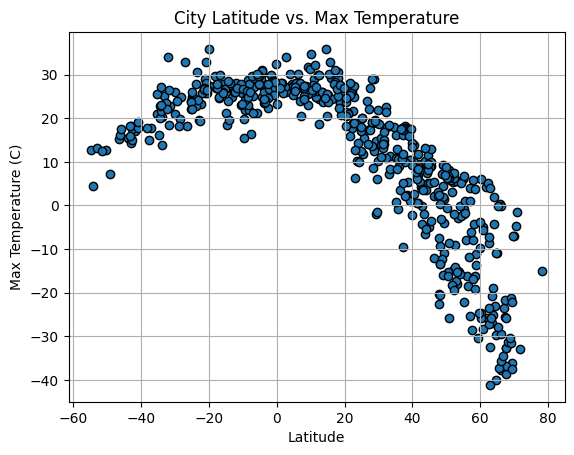

In [8]:
# Build scatter plot for latitude vs. temperature
lat = city_data_df['Lat']
temp = city_data_df['Max Temp']
plt.scatter(lat, temp, edgecolors= 'black')

# Incorporate the other graph properties
plt.grid()
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

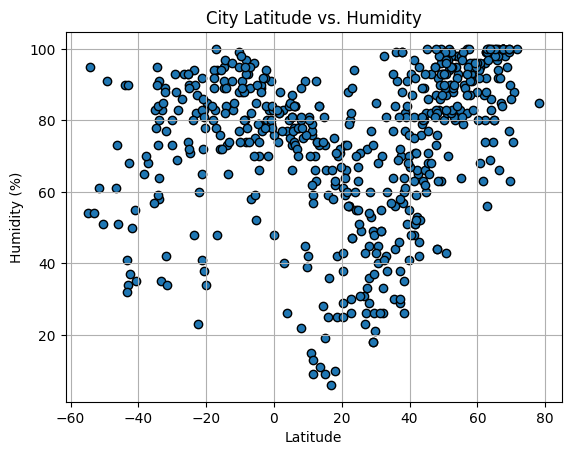

In [9]:
# Build the scatter plots for latitude vs. humidity
lat = city_data_df['Lat']
humidity = city_data_df['Humidity']
plt.scatter(lat, humidity, edgecolors= 'black')

# Incorporate the other graph properties
plt.grid()
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

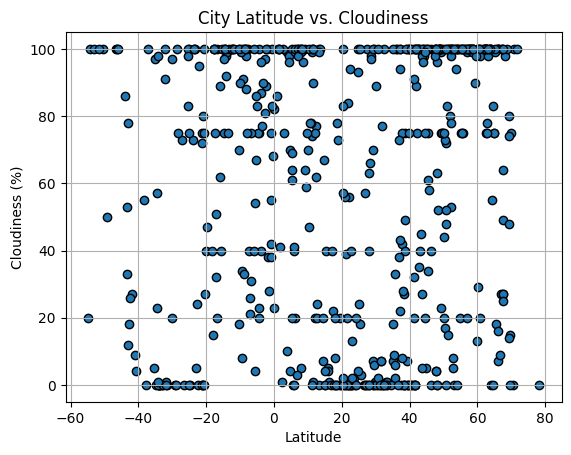

In [10]:
# Build the scatter plots for latitude vs. cloudiness
lat = city_data_df['Lat']
clouds = city_data_df['Cloudiness']
plt.scatter(lat, clouds, edgecolors= 'black')

# Incorporate the other graph properties
plt.grid()
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

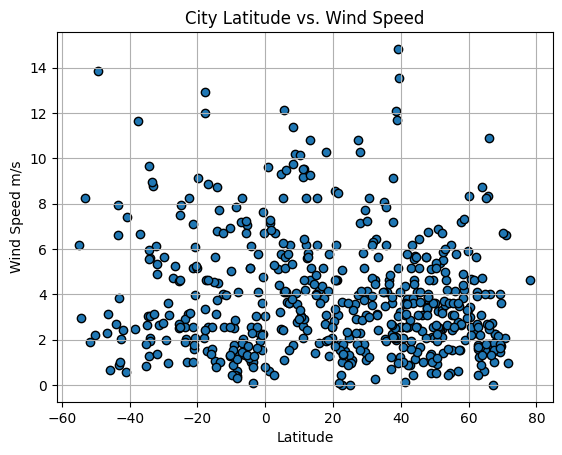

In [11]:
# Build the scatter plots for latitude vs. wind speed
lat = city_data_df['Lat']
wind = city_data_df['Wind Speed']
wind = (wind * .44704)
plt.scatter(lat, wind, edgecolors= 'black')

# Incorporate the other graph properties
plt.grid()
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed m/s')

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linreg(x_values, y_values, yaxis, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(yaxis)
    print(f"The r-value is: {rvalue}")

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']> 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,saiki,32.9500,131.9000,7.277778,81,1,7.00,JP,1707771414
2,ust-nera,64.5667,143.2000,-39.972222,98,83,1.34,RU,1707771414
5,riosucio,5.4216,-75.7032,26.672222,66,64,2.48,CO,1707771414
8,panacan,9.2463,118.4082,23.127778,91,100,6.26,PH,1707771415
9,yarmouth,41.7057,-70.2286,7.011111,71,0,5.75,US,1707771415


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']< 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nova vicosa,-17.8919,-39.3719,26.988889,80,15,7.49,BR,1707771414
3,grytviken,-54.2811,-36.5092,4.527778,95,100,6.64,GS,1707771414
4,avarua,-21.2078,-159.7750,29.027778,65,75,11.50,CK,1707771414
6,sao felix do xingu,-6.6447,-51.9950,27.050000,82,31,4.54,BR,1707771257
7,calama,-22.4667,-68.9333,23.272222,23,0,18.41,CL,1707771366


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8719923018507031


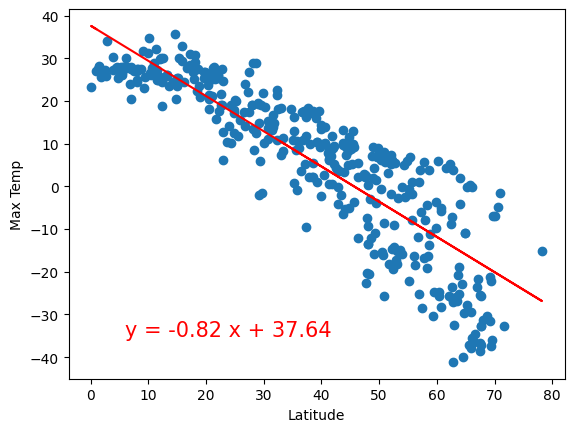

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
linreg(x_values, y_values, 'Max Temp', (6, -35))

The r-value is: 0.6755323711641483


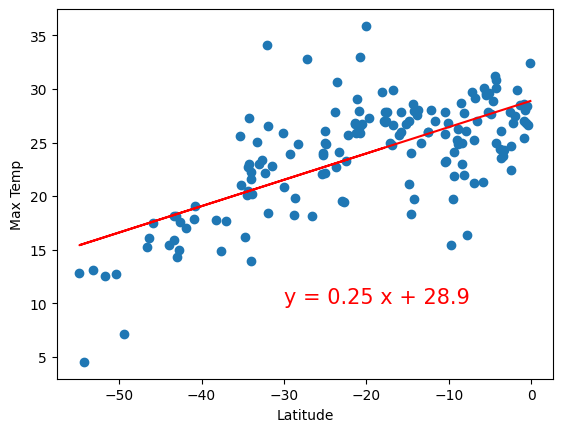

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
linreg(x_values, y_values, 'Max Temp', (-30, 10))

**Discussion about the linear relationship:** 
The first observation of these two graphs is that the slope of the northern hemisphere line is significantly more severe than that of the southern hemisphere. This difference indicates that temperature differences are more pronounced as you move away from the equator in the northern hemisphere than those in the southern hemisphere. Comparing the r-values of each graph, one can observe that the linear relationship between max temp and latitude in the northern hemisphere is strongly correlated; whereas the same relationship in the southern hemisphere is less so but still above 0.65. It is reasonable to conclude that in either direction, max temperatures will decrease with distance from the equator.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.4784507775210929


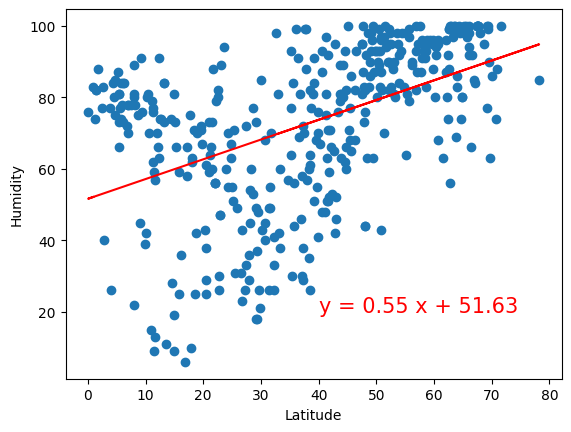

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
linreg(x_values, y_values, 'Humidity', (40, 20))

The r-value is: 0.36759966567768937


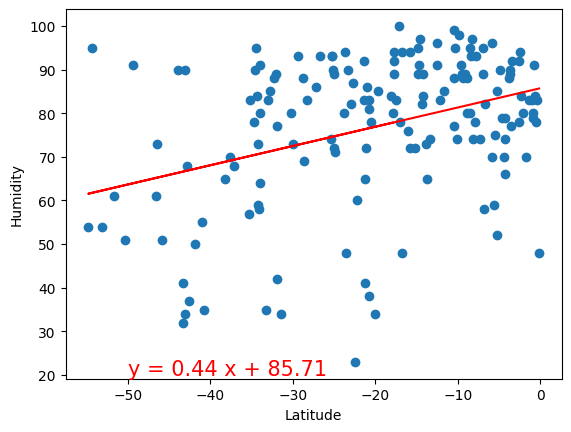

In [24]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
linreg(x_values, y_values, 'Humidity', (-50, 20))

**Discussion about the linear relationship:** 
An interesting thing to note about these two graphs is that both have positively sloping line equations and drastically different y-intercept values, in contrast to those comparing temperatures. The points in both plots range from low to high percent humidity at nearly every position on the x-axis, suggesting that there is likely a weaker correlation between a city's latitude and humidity. This is supported by r-values that are each lower than 0.50.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.2222943634268053


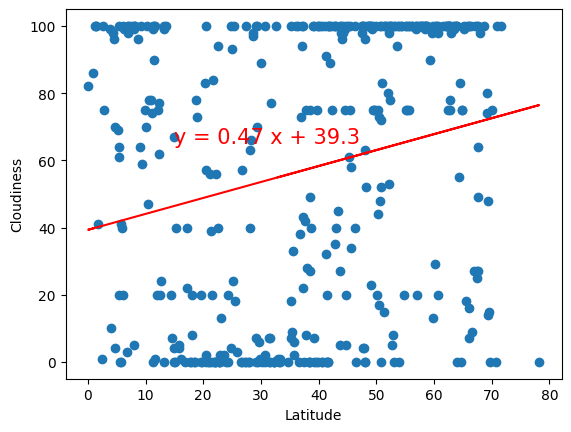

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
linreg(x_values, y_values, 'Cloudiness', (15, 65))

The r-value is: 0.22564239872069172


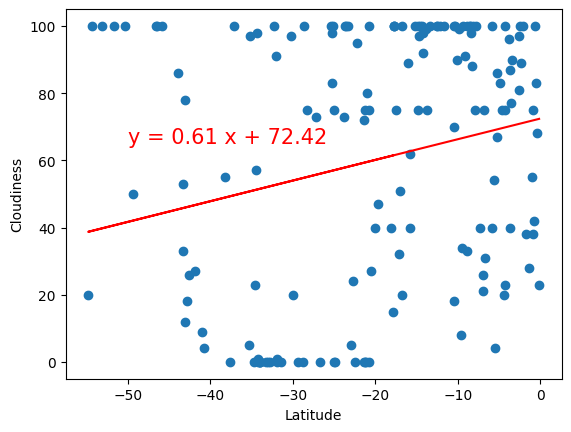

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
linreg(x_values, y_values, 'Cloudiness', (-50, 65))

**Discussion about the linear relationship:** 
Even more pronounced than previous two graphs relating humidity and latitude, there is a wide spread of data points on this graph indicating a weak correlation between latitude and cloudiness. Again, the y-intercept values are drastically different, which would be unexpected if there was a strong linear relationship. With nearly identical r-values lower than 0.25, it can be concluded that distance from the equator cannot be used to predict the likelihood of cloud coverage. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.2527899477339086


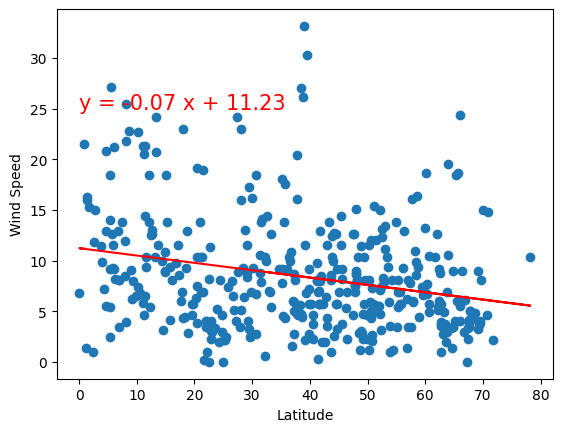

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
linreg(x_values, y_values, 'Wind Speed', (0, 25))

The r-value is: -0.15732222844923902


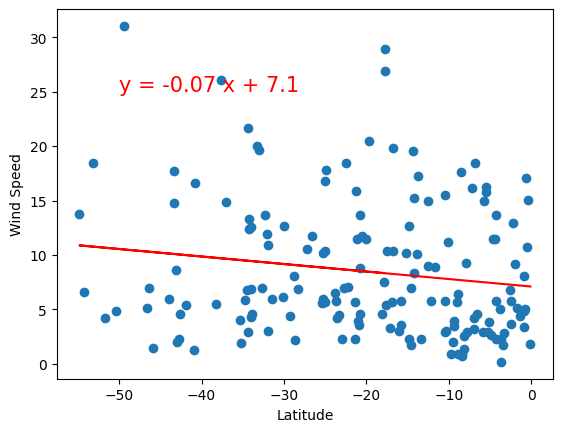

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
linreg(x_values, y_values, 'Wind Speed', (-50, 25))

**Discussion about the linear relationship:** The final relationship examined is between latitude and wind speed, and again upon first glance looks to be weak. While most of the cities have wind speeds below 20 mph, the points in each plot illustrate a wide spread at each value of latitude. With r-values of -0.25 (Northern Hemisphere) and -0.15 (Southern Hemisphere), it is reasonable to say that the relationship is weak, and a prediction of wind speed based upon a given latitude is unlikely to be accurate.